In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pycandy import DiscreteDynamicalSystem as dds

# Standard map

## Time series

In [7]:
u = np.array([0.2, 0.5])
k = 1.5
N = int(1e6)
methods = ["QR", "QR_HH"]
time = np.arange(1, N + 1)
np.random.seed(0)
colors = ["black", "red", "blue"]

### Analytical Jacobian

In [8]:
ds = dds(model="standard map")
exponents_analytical = []

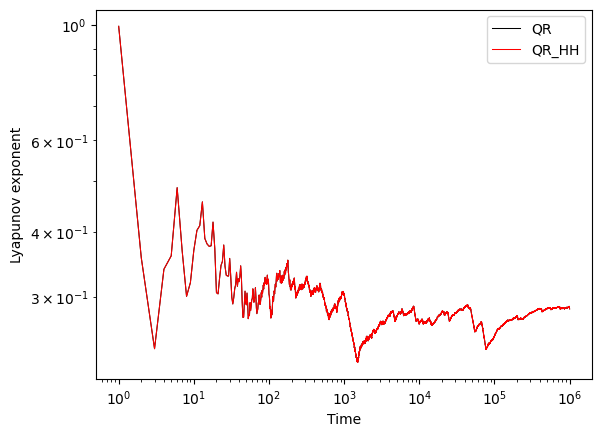

In [9]:
for i, method in enumerate(methods):
    exponents = ds.lyapunov(u, N, parameters=k, method=method, return_history=True)
    plt.plot(time, exponents[:, 0], label=method, c=colors[i], lw=0.75)
    exponents_analytical.append(exponents[:, 0])
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Time")
plt.ylabel("Lyapunov exponent")
plt.legend()

### Numerical Jacobian

In [10]:
from numba import njit
@njit
def standard_map(u, parameters):
    x, y = u
    k = parameters[0]
    x_new = x + y
    y_new = y + k * np.sin(2 * np.pi * x_new) / (2 * np.pi)
    x_new = x_new % 1
    y_new = y_new % 1
    return np.array([x_new, y_new])

In [12]:
ds = dds(mapping=standard_map, system_dimension=2, number_of_parameters=1)
exponents_numerical = []

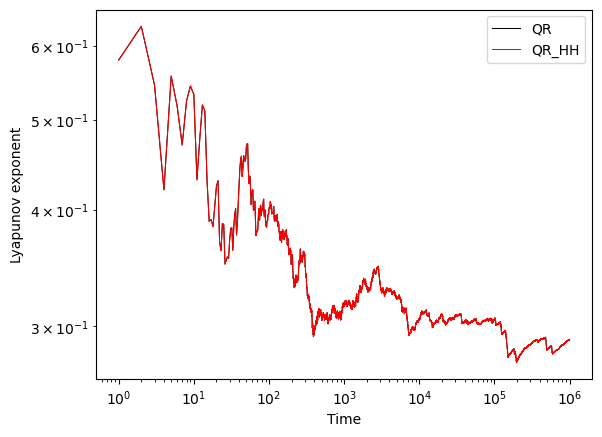

In [13]:
for i, method in enumerate(methods):
    exponents = ds.lyapunov(u, N, parameters=k, method=method, return_history=True)
    plt.plot(time, exponents[:, 0], label=method, c=colors[i], lw=0.75)
    exponents_numerical.append(exponents[:, 0])
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Time")
plt.ylabel("Lyapunov exponent")
plt.legend()

### Comparisson

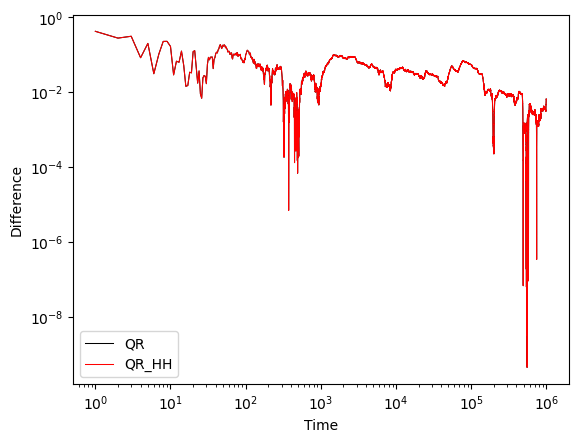

In [14]:
for i, method in enumerate(methods):
    plt.plot(time, np.abs(exponents_analytical[i] - exponents_numerical[i]), label=method, c=colors[i], lw=0.75)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Time")
plt.ylabel("Difference")
plt.legend()

## Final value

In [15]:
u = np.array([0.2, 0.5])
k = 1.5
N = int(1e6)

### Analytical Jacobian

In [16]:
ds = dds(model="standard map")
methods = ["QR", "QR_HH"]
exponents_analitical = []
for method in methods:
    exponents = ds.lyapunov(u, N, parameters=k, method=method)
    print(f"Method: {method}, Lyapunov Exponent: {exponents}, sum: {np.sum(exponents)}")
    exponents_analitical.append(exponents)

Method: QR, Lyapunov Exponent: [ 0.2841174 -0.2841174], sum: -1.1102230246251565e-16
Method: QR_HH, Lyapunov Exponent: [ 0.2841174 -0.2841174], sum: 5.551115123125783e-17


### Numerical Jacobian

In [17]:
ds = dds(mapping=standard_map, system_dimension=2, number_of_parameters=1)
methods = ["QR", "QR_HH"]
exponents_numerical = []
for method in methods:
    exponents = ds.lyapunov(u, N, parameters=k, method=method)
    print(f"Method: {method}, Lyapunov Exponent: {exponents}, sum: {np.sum(exponents)}")
    exponents_numerical.append(exponents)

Method: QR, Lyapunov Exponent: [ 0.29060195 -0.29043213], sum: 0.0001698208871868112
Method: QR_HH, Lyapunov Exponent: [ 0.29060195 -0.29043213], sum: 0.00016982088346295665


### Comparisson between them

In [18]:
methods = ["QR", "QR_HH"]
for i, method in enumerate(methods):
    diff = abs(exponents_analitical[i] - exponents_numerical[i])
    print(f"Method: {method}, Difference: {diff}")

Method: QR, Difference: [0.00648455 0.00631473]
Method: QR_HH, Difference: [0.00648455 0.00631473]


# Logistic map

In [20]:
u = 0.5
r = 1
ds = dds(model="logistic map")

In [21]:
ds.lyapunov(u, 1000,  parameters=r, transient_time=500)

-0.0027417407304249036

In [22]:
%%time
u = 0.5
param_range = (2.4, 4, 500)
lypnv = np.zeros(param_range[2])
for i in range(param_range[2]):
    parameters = param_range[0] + i * (param_range[1] - param_range[0]) / (param_range[2] - 1)

    lypnv[i] = ds.lyapunov(u, 1000, parameters=parameters, transient_time=500)

CPU times: user 60.6 ms, sys: 2.09 ms, total: 62.7 ms
Wall time: 62.2 ms


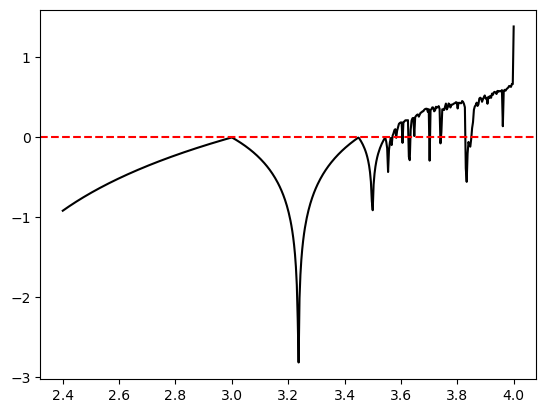

In [23]:
plt.plot(np.linspace(param_range[0], param_range[1], param_range[2]), lypnv, "k")
# Plot line at y=0
plt.axhline(0, color="red", linestyle="--")